In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('df_Movie_Financials.xlsx')

In [4]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 7 columns):
Unnamed: 0          5540 non-null int64
tconst              5540 non-null object
P_Cost              5540 non-null float64
Dom_Gross           5540 non-null int64
Frgn_Gross          5540 non-null int64
WW_Gross            5540 non-null int64
Domestic Opening    5540 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 303.1+ KB


In [8]:
# Create new column, which represents the movie profit
df['profit'] = df['WW_Gross'] - df['P_Cost']

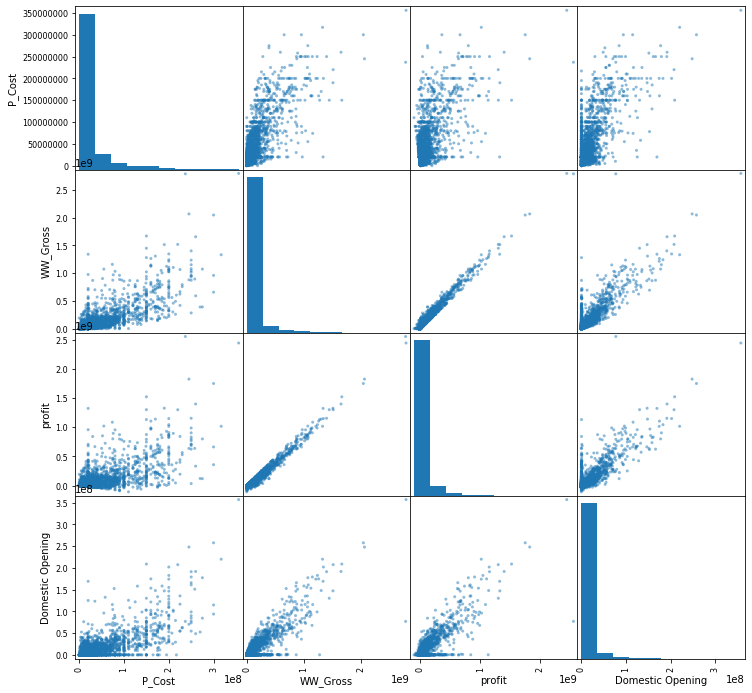

In [12]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df[['P_Cost', 'WW_Gross', 'profit', 'Domestic Opening']], figsize=(12,12));

In [ ]:
# Comments: There is a very strong positive linear relationship between WW_Gross and profit.

In [11]:
# Understanding opening dates
df['Domestic Opening'].head(40)

0      56061504
1        388166
2     108435841
3       5935256
4        501003
5      20617667
6             0
7       9600000
8         53218
9         73837
10     50237000
11     10016021
12            0
13     16025987
14       586028
15     10208431
16     60119509
17     47743273
18     18068372
19        85327
20     19635996
21      1202000
22     97852865
23     16849640
24    102685961
25     12400125
26        39550
27     33369559
28       229685
29       122014
30     10600000
31         8222
32        15117
33      9912110
34       180000
35      3755575
36       531018
37     52535096
38      6021106
39        36272
Name: Domestic Opening, dtype: int64

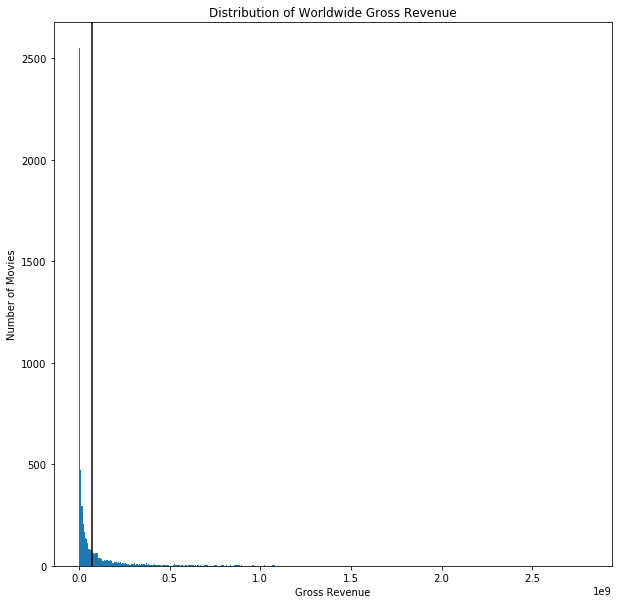

In [16]:
# Create a plot that shows the Distribution of Worldwide Gross Revenue
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df['WW_Gross'], bins='auto')
ax.set_title('Distribution of Worldwide Gross Revenue')
ax.set_xlabel('Gross Revenue')
ax.set_ylabel('Number of Movies')
ax.axvline(df['WW_Gross'].mean(), color='black');

In [17]:
# Comments from above: Looks like there are a large number of 0.0 values.
# I'd like to plot the information for all movies that actually made money.